In [1]:
import requests

# Specify remote urls
udds_url   = 'https://www.epa.gov/sites/default/files/2015-10/uddscol.txt'
hwfet_url  = 'https://www.epa.gov/sites/default/files/2015-10/hwycol.txt'

# Specify local filenames
udds_file  = 'UDDS.TXT'
hwfet_file = 'HWFET.TXT'

# Define function to download from url to local file
def get_drive_schedule_file(url, name):
    
    # Retrieve response from url
    response = requests.get(url)
    
    # Open the local file
    with open(name, "wb") as file:
        
        # Write response content to the local file
        file.write(response.content)

# Download both files locally
get_drive_schedule_file(udds_url,  udds_file)
get_drive_schedule_file(hwfet_url, hwfet_file)

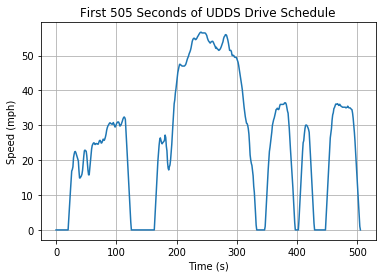

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to read drive schedule from a loca file
def read_drive_schedule(name):

    # Open the local file
    with open(name) as file:

        # Read file as list of lines with newlines discarded
        data = file.read().splitlines()

    # Discard two header lines
    data = data[2:]

    # Split lines at tab to separate time and speed fields
    data = [d.split('\t') for d in data]

    # Extract time and speed fields as seaparate numpy vectors
    time  = np.array([float(d[0]) for d in data])
    speed = np.array([float(d[1]) for d in data])
    
    return (time, speed)

# Get HWFET drive schedule
time_hwfet, speed_hwfet = read_drive_schedule("HWFET.txt")

# Get UDDS
time_505,   speed_505   = read_drive_schedule("UDDS.txt")

# Keep only the first 505 seconds from the schedule
keep = time_505<=505

# Trim excess
speed_505 =speed_505[keep]
time_505  = time_505[keep]

plt.plot(time_505, speed_505)

plt.title('First 505 Seconds of UDDS Drive Schedule')
plt.grid()
plt.ylabel('Speed (mph)')
plt.xlabel('Time (s)')
plt.show() 

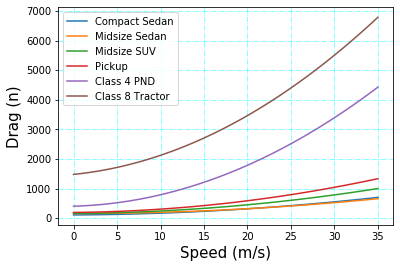

In [3]:
max_mps = 35

circles6 = [
    ['Compact Sedan',    108.2,  1.6, 0.438],
    ['Midsize Sedan',    153.9,  0.0, 0.410],
    ['Midsize SUV',      156.3,  2.2, 0.625],
    ['Pickup',           191.9,  2.6, 0.857],
    ['Class 4 PND',      402.7,  8.1, 3.053],
    ['Class 8 Tractor', 1477.6, 29.6, 3.489]]

x = np.linspace(0, max_mps, 100)
lines = []
for name,a,b,c in circles6:
    
    force = np.power(x,0)*a + np.power(x,1)*b + np.power(x,2)*c
    l, = plt.plot(x, force, label=name)
    lines.append(l)
    
plt.xlabel('Speed (m/s)', fontsize=15)
plt.ylabel('Drag (n)', fontsize=15)
plt.legend(handles=lines, loc='best')
plt.grid(b=True, color='aqua', alpha=0.6, linestyle='dashdot')
plt.show()


In [17]:
print(speed_505)

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   3.   5.9  8.6 11.5 14.3 16.9 17.3
 18.1 20.7 21.7 22.4 22.5 22.1 21.5 20.9 20.4 19.8 17.  14.9 14.9 15.2
 15.5 16.  17.1 19.1 21.1 22.7 22.9 22.7 22.6 21.3 19.  17.1 15.8 15.8
 17.7 19.8 21.6 23.2 24.2 24.6 24.9 25.  24.6 24.5 24.7 24.8 24.7 24.6
 24.6 25.1 25.6 25.7 25.4 24.9 25.  25.4 26.  26.  25.7 26.1 26.7 27.5
 28.6 29.3 29.8 30.1 30.4 30.7 30.7 30.5 30.4 30.3 30.4 30.8 30.4 29.9
 29.5 29.8 30.3 30.7 30.9 31.  30.9 30.4 29.8 29.9 30.2 30.7 31.2 31.8
 32.2 32.4 32.2 31.7 28.6 25.3 22.  18.7 15.4 12.1  8.8  5.5  2.2  0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.3  6.6  9.9 13.2
 16.5 19.8 22.2 24.3 25.8 26.4 25.7 25.1 24.7 25.  25.2 25.4 25.8 27.2
 26.5 24.  22.7 19.4 17.7 17.2 18.1 18.6 20.  22.2 24.5 27.3 30.5 33.5
 36.2 37.3

0.0
144.68190845835207
162.41565484545438
369.0315096995289


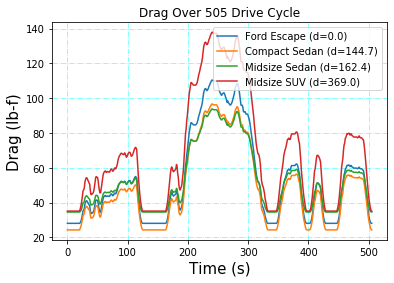

In [31]:
example = [
    ['Ford Escape',     28.11, 0.0007, 0.02559],
    ['Compact Sedan',    108.2,  1.6, 0.438],
    ['Midsize Sedan',    153.9,  0.0, 0.410],
    ['Midsize SUV',      156.3,  2.2, 0.625]]

lines = []
for name,a,b,c in example:
    
    if name!='Ford Escape':
        a/=4.44822
        b/=9.9525
        c/=22.267

    force = np.power(speed_505,0)*a + np.power(speed_505,1)*b + np.power(speed_505,2)*c
    
    if name=='Ford Escape':
        ref = force
        
    d = np.sqrt(np.sum(np.power(force-ref,2)))
    print(d)

    l, = plt.plot(time_505, force, label="{0} (d={1:.1f})".format(name,d))
    lines.append(l)
    
plt.title('Drag Over 505 Drive Cycle')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Drag (lb-f)', fontsize=15)
plt.legend(handles=lines, loc='best')
plt.grid(b=True, color='aqua', alpha=0.6, linestyle='dashdot')
plt.show()

In [4]:
testcars = [
["https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx","2022"],
["https://www.epa.gov/system/files/documents/2022-04/21-tstcar-2022-04-15.xlsx","2021"],
["https://www.epa.gov/sites/default/files/2021-03/20tstcar-2021-03-02.xlsx","2020"],
["https://www.epa.gov/sites/default/files/2020-10/19tstcar-2020-10-02.xlsx","2019"],
["https://www.epa.gov/sites/default/files/2018-10/18tstcar-2018-10-24.xlsx","2018"],
["https://www.epa.gov/sites/default/files/2018-06/17tstcar-2018-05-30.xlsx","2017"],
["https://www.epa.gov/sites/default/files/2016-07/16tstcar.csv","2016"],
["https://www.epa.gov/sites/default/files/2016-07/15tstcar.csv","2015"],
["https://www.epa.gov/sites/default/files/2016-07/14tstcar.csv","2014"],
["https://www.epa.gov/sites/default/files/2016-07/13tstcar.csv","2013"],
["https://www.epa.gov/sites/default/files/2016-07/12tstcar.csv","2012"],
["https://www.epa.gov/sites/default/files/2016-07/11tstcar.csv","2011"],
["https://www.epa.gov/sites/default/files/2016-07/10tstcar.csv","2010"],
["https://www.epa.gov/sites/default/files/2016-07/09tstcar.csv","2009a"],
["https://www.epa.gov/sites/default/files/2016-07/09tstcar-laterelease.csv","2009b"],
["https://www.epa.gov/sites/default/files/2016-07/08tstcar.csv","2008"],
["https://www.epa.gov/sites/default/files/2016-07/07tstcar.csv","2007"],
["https://www.epa.gov/sites/default/files/2016-07/06tstcar.csv","2006"],
["https://www.epa.gov/sites/default/files/2016-07/05tstcar.csv","2005"],
["https://www.epa.gov/sites/default/files/2016-07/04tstcar.csv","2004"],
["https://www.epa.gov/sites/default/files/2016-07/03tstcar.csv","2003"]]
#,
#["https://www.epa.gov/sites/default/files/2016-07/02tstcar.csv","2002"],
#["https://www.epa.gov/sites/default/files/2016-07/01tstcar.csv","2001"],
#["https://www.epa.gov/sites/default/files/2016-07/00tstcar.csv","2000"],
#["https://www.epa.gov/sites/default/files/2016-07/99tstcar.zip","1999"],
#["https://www.epa.gov/sites/default/files/2016-07/98tstcar.zip","1998"],
#["https://www.epa.gov/sites/default/files/2016-07/97mftcl.zip","1997"],
#["https://www.epa.gov/sites/default/files/2016-07/96mftcl.zip","1996"],
#["https://www.epa.gov/sites/default/files/2016-07/95mftcl.zip","1995"],
#["https://www.epa.gov/sites/default/files/2016-07/94mftcl.zip","1994"],
#["https://www.epa.gov/sites/default/files/2016-07/93mftcl.zip","1993"],
#["https://www.epa.gov/sites/default/files/2016-07/92mftcl.zip","1992"],
#["https://www.epa.gov/sites/default/files/2016-07/91mftcl.zip","1991"],
#["https://www.epa.gov/sites/default/files/2016-07/90mftcl.zip","1990"],
#["https://www.epa.gov/sites/default/files/2016-07/89mftcl.zip","1989"],
#["https://www.epa.gov/sites/default/files/2016-07/88mftcl.zip","1988"],
#["https://www.epa.gov/sites/default/files/2016-07/87mftcl.zip","1987"],
#["https://www.epa.gov/sites/default/files/2016-07/86mftcl.zip","1986"],
#["https://www.epa.gov/sites/default/files/2016-07/85mftcl.zip","1985"],
#["https://www.epa.gov/sites/default/files/2016-07/84mftcl.zip","1984"]]

import xlrd
import csv
import zipfile
import os

def csv_from_excel(name):
    wb = xlrd.open_workbook('temp.xlsx')
    sh = wb.sheet_by_index(0)
    your_csv_file = open(name+'.csv', 'w', newline='')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# Define function to download from url to local file
def get_drive_schedule_file(url, name):
    
    # Retrieve response from url
    response = requests.get(url)
    
    # Open the local file
    with open(name, "wb") as file:
        
        # Write response content to the local file
        file.write(response.content)

import pandas
        
big = []
for url, name in testcars:
    print('Processing {0}'.format(name))
    tail = url.split('.')[-1]
    localname = name+'.'+tail
    if not os.path.exists(localname):
        get_drive_schedule_file(url, localname)
    year = int(localname[0:4])
    if tail=='csv':
        df = pandas.read_csv(localname)
    else:
        df = pandas.read_excel(localname)
    if year<2009 or (year==2009 and name[4]=='a'):
        colnames = [
            'MDLYR_DT', 
            'VI_MFR_NM', 
            'CL_NM', 
            'TPF_DYN_TRK_A_MSR', 
            'TPF_DYN_TRK_B_MSR', 
            'TPF_DYN_TRK_C_MSR']
    else:
        colnames = [
            'Model Year', 
            'Represented Test Veh Make', 
            'Represented Test Veh Model', 
            'Target Coef A (lbf)', 
            'Target Coef B (lbf/mph)', 
            'Target Coef C (lbf/mph**2)']
        
    cols = df[colnames]
    
    big += cols.values.tolist() 

Processing 2022
Processing 2021
Processing 2020
Processing 2019
Processing 2018
Processing 2017
Processing 2016
Processing 2015
Processing 2014
Processing 2013
Processing 2012
Processing 2011
Processing 2010
Processing 2009a
Processing 2009b
Processing 2008
Processing 2007
Processing 2006
Processing 2005
Processing 2004
Processing 2003


In [5]:
for l in big[1:30]:
    print(l)

[2022, 'Aston Martin', 'DB11 V8', 40.94, 0.0169, 0.0271]
[2022, 'Aston Martin', 'DBS', 40.94, 0.0169, 0.0271]
[2022, 'Aston Martin', 'DBS', 40.94, 0.0169, 0.0271]
[2022, 'Aston Martin', 'DBX', 60.68, -0.3286, 0.0373]
[2022, 'Aston Martin', 'DBX', 60.68, -0.3286, 0.0373]
[2022, 'Aston Martin', 'Vantage V8', 40.94, 0.0169, 0.0271]
[2022, 'Aston Martin', 'Vantage V8', 40.94, 0.0169, 0.0271]
[2022, 'BMW', '228i Gran Coupe', 36.3, 0.043, 0.01823]
[2022, 'BMW', '228i Gran Coupe', 36.3, 0.043, 0.01823]
[2022, 'BMW', '228i Gran Coupe', 47.3, 0.067, 0.01781]
[2022, 'BMW', '228i Gran Coupe', 47.3, 0.067, 0.01781]
[2022, 'BMW', '228i xDrive Gran Coupe', 41.3, -0.105, 0.01965]
[2022, 'BMW', '228i xDrive Gran Coupe', 41.3, -0.105, 0.01965]
[2022, 'BMW', '228i xDrive Gran Coupe', 52.5, -0.08, 0.01968]
[2022, 'BMW', '228i xDrive Gran Coupe', 52.5, -0.08, 0.01968]
[2022, 'BMW', '230i Coupe', 45.1, -0.19, 0.02006]
[2022, 'BMW', '230i Coupe', 45.1, -0.19, 0.02006]
[2022, 'BMW', '330e', 50.0, 0.083, 0.01

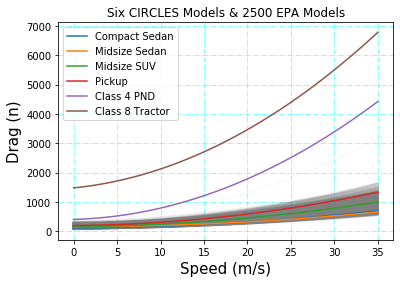

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

max_mps = 35

x = np.linspace(0, max_mps, 100)
lines = []
plt.figure()
epa = 2500
for k in range(epa):
    n = random.randrange(0, len(big))
    year, make, model, a, b, c = big[n]
    a*=4.44822
    b*=9.9525
    c*=22.267
    force = np.power(x,0)*a + np.power(x,1)*b + np.power(x,2)*c
    l, =plt.plot(x, force, label=name, color='gray', alpha=0.05)
    lines.append(l)
    
x = np.linspace(0, max_mps, 100)
lines = []
for name,a,b,c in circles6:
    
    force = np.power(x,0)*a + np.power(x,1)*b + np.power(x,2)*c
    l, = plt.plot(x, force, label=name)
    lines.append(l)    
    
plt.title('Six CIRCLES Models & {0} EPA Models'.format(epa))
plt.xlabel('Speed (m/s)', fontsize=15)
plt.ylabel('Drag (n)', fontsize=15)
plt.legend(handles=lines, loc='best')
plt.grid(b=True, color='aqua', alpha=0.6, linestyle='dashdot')
plt.show()

In [7]:
print(len(big))

76335
